In [1]:
#importing the libraries needed 

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

In [2]:
#Declaring the headers 

headers = {"Accept-Language": "en-US,en;q=0.5"}

In [3]:
#declaring the list of empty variables, So that we can append the data overall

movie_name = []
description = []
genre = []
year = []
time= []
rating= []
metascore = []
votes = []
gross = []

In [4]:
#creating an array of values and passing it in the url for dynamic webpages

pages = np.arange(1,1000,100)

In [5]:
for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    sleep(randint(2,8))
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
        
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text[1:5]
        year.append(year_of_release)
        
        runtime = store.p.find("span", class_ = 'runtime').text[0:3]
        time.append(runtime)
        
        movie_genre = store.find('span', class_ = 'genre').text[1:].split(",")[0]
        genre.append(movie_genre)
        
        rate = store.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        rating.append(rate)
        
        meta = store.find('span', class_ = "metascore").text if store.find('span', class_ = "metascore") else 0
        metascore.append(meta)
        
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text.strip().replace(',','')
        votes.append(vote)
        
        grosses = value[1].text.replace('$','',).replace('M','',) if len(value)>1 else 0
        gross.append(grosses)
        
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else "None"
        description.append(description_)

In [6]:
#creating a dataframe 
movie_list = pd.DataFrame({ "Movie Name": movie_name, 
                           "Description": description,
                           "Genre": genre,
                           "Year of Release" : year, 
                           "Watch Time": time,
                           "Movie Rating": rating, 
                           "Meatscore of movie": metascore, 
                           "Votes": votes, "Gross (in M)": gross })

In [7]:
movie_list.head()

,Movie Name,Description,Genre,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross (in M)
0,The Shawshank Redemption,"Over the course of several years, two convicts...",Drama,1994,142,9.3,81,2699133,28.34
1,The Godfather,The aging patriarch of an organized crime dyna...,Crime,1972,175,9.2,100,1873343,134.97
2,The Dark Knight,When the menace known as the Joker wreaks havo...,Action,2008,152,9.0,84,2672870,534.86
3,Schindler's List,"In German-occupied Poland during World War II,...",Biography,1993,195,9.0,95,1364512,96.90
4,The Godfather Part II,The early life and career of Vito Corleone in ...,Crime,1974,202,9.0,90,1280215,57.30


In [8]:
movie_list['Gross (in M)'] = pd.to_numeric(movie_list['Gross (in M)'], errors='coerce')

In [9]:
movie_list['Watch Time'] = movie_list['Watch Time'].astype(int)
movie_list['Movie Rating'] = movie_list['Movie Rating'].astype(float)
movie_list['Gross (in M)'] = movie_list['Gross (in M)'].astype(float)
movie_list['Votes'] = movie_list['Votes'].astype(int)

In [10]:
movie_list.to_csv("IMDb - Top 1000 Movies.csv")

#### Dataset was edited and renamed to IMDb Rating

In [11]:
df = pd.read_csv("IMDb Rating.csv")
df.head()

,Unnamed: 0,Movie Name,Description,Genre,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross (in M)
0,0,Jai Bhim,When a tribal man is arrested for a case of al...,Crime,2021,164,9.4,0,155192,0.00
1,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama,1994,142,9.3,80,2503187,28.34
2,2,The Godfather,"The Godfather follows Vito Corleone, Don of th...",Crime,1972,175,9.2,100,1725539,134.97
3,3,Soorarai Pottru,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Drama,2020,153,9.1,0,104294,0.00
4,4,The Dark Knight,When the menace known as the Joker wreaks havo...,Action,2008,152,9.0,84,2452783,534.86


In [12]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [13]:
df.head()

,Movie Name,Description,Genre,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross (in M)
0,Jai Bhim,When a tribal man is arrested for a case of al...,Crime,2021,164,9.4,0,155192,0.00
1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama,1994,142,9.3,80,2503187,28.34
2,The Godfather,"The Godfather follows Vito Corleone, Don of th...",Crime,1972,175,9.2,100,1725539,134.97
3,Soorarai Pottru,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Drama,2020,153,9.1,0,104294,0.00
4,The Dark Knight,When the menace known as the Joker wreaks havo...,Action,2008,152,9.0,84,2452783,534.86


# Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Name          1000 non-null   object 
 1   Description         1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Year of Release     1000 non-null   int64  
 4   Watch Time          1000 non-null   int64  
 5   Movie Rating        1000 non-null   float64
 6   Meatscore of movie  1000 non-null   int64  
 7   Votes               1000 non-null   int64  
 8   Gross (in M)        1000 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


# Data Cleaning

In [15]:
df.isna()

,Movie Name,Description,Genre,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross (in M)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

Movie Name            0
Description           0
Genre                 0
Year of Release       0
Watch Time            0
Movie Rating          0
Meatscore of movie    0
Votes                 0
Gross (in M)          0
dtype: int64

# Data Visualization

<AxesSubplot:ylabel='Frequency'>

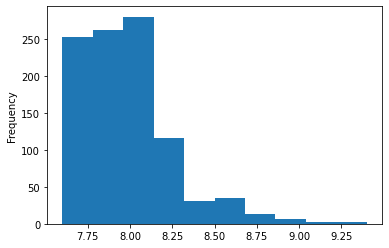

In [17]:
df['Movie Rating'].plot(kind = "hist")

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\rishi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


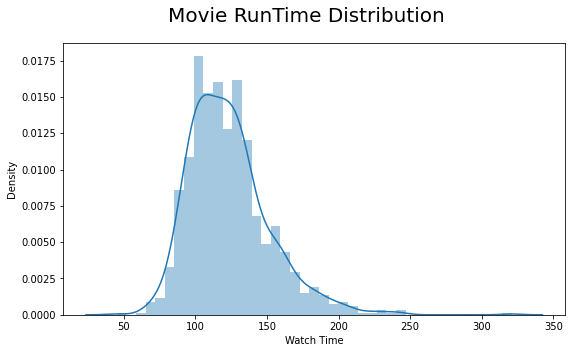

In [19]:
plt.figure(figsize=[9,5])
run = sns.distplot(df['Watch Time'])
plt.suptitle("Movie RunTime Distribution", fontsize=20)
plt.show()

<AxesSubplot:xlabel='Votes', ylabel='Movie Rating'>

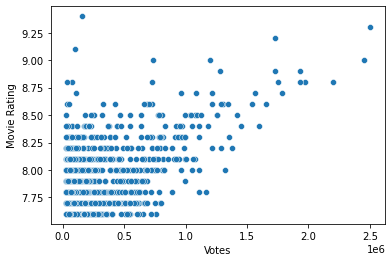

In [20]:
sns.scatterplot(x="Votes",y="Movie Rating",data= df)

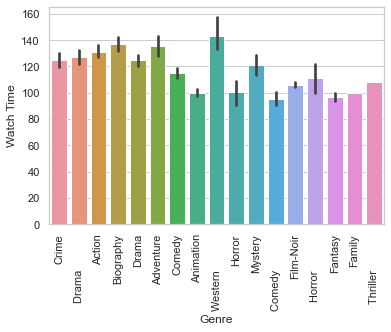

In [21]:
sns.set(style = "whitegrid")
sns.barplot(x="Genre",y="Watch Time",data=df)
plt.xticks(rotation=90)
plt.show()

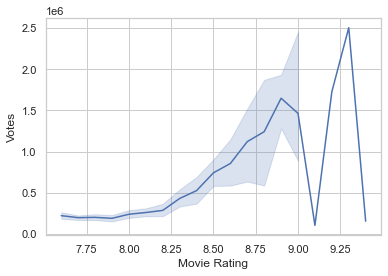

In [22]:
sns.lineplot(x="Movie Rating", y="Votes", data=df)
plt.show()

<AxesSubplot:>

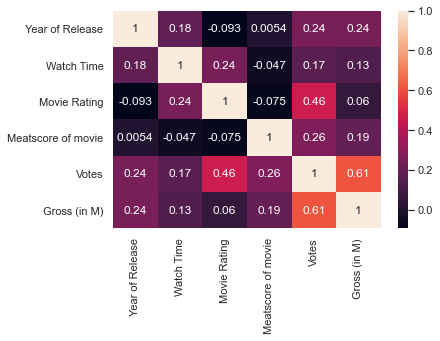

In [23]:
corr = df.corr()
sns.heatmap(corr, annot = True)

# Statistical Analysis

In [24]:
df.describe()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross (in M)
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,1991.110000,123.421000,7.967900,65.240000,2.865253e+05,55.095770
std,23.801353,28.441179,0.278886,31.437473,3.483148e+05,103.380988
min,1920.000000,45.000000,7.600000,0.000000,2.542000e+04,0.000000
25%,1975.000000,103.000000,7.700000,63.000000,5.595750e+04,0.267500
50%,1999.000000,119.500000,7.900000,76.000000,1.372500e+05,8.220000
75%,2010.000000,137.000000,8.100000,86.000000,3.961578e+05,57.525000
max,2021.000000,321.000000,9.400000,100.000000,2.503187e+06,936.660000


In [25]:
df.var()

Year of Release       5.665044e+02
Watch Time            8.089007e+02
Movie Rating          7.777737e-02
Meatscore of movie    9.883147e+02
Votes                 1.213232e+11
Gross (in M)          1.068763e+04
dtype: float64

In [26]:
df.corr()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross (in M)
Year of Release,1.000000,0.181169,-0.092904,0.005415,0.241164,0.243040
Watch Time,0.181169,1.000000,0.243316,-0.047016,0.165290,0.134314
Movie Rating,-0.092904,0.243316,1.000000,-0.075479,0.460701,0.059910
Meatscore of movie,0.005415,-0.047016,-0.075479,1.000000,0.258361,0.193121
Votes,0.241164,0.165290,0.460701,0.258361,1.000000,0.608956
Gross (in M),0.243040,0.134314,0.059910,0.193121,0.608956,1.000000
